# PLE01, Víctor Vega Sobral


| **Nombre de la Variable** | **Rol** | **Tipo**    | **Descripción**                                  | **Valores Faltantes** |
|---------------------------|---------|-------------|--------------------------------------------------|-----------------------|
| **User ID**               | ID      | Categórica  |                                                  | No                    |
| **Category 1**            | Feature | Continua    | Retroalimentación promedio del usuario sobre galerías de arte  | No                    |
| **Category 2**            | Feature | Continua    | Retroalimentación promedio del usuario sobre clubes de baile   | No                    |
| **Category 3**            | Feature | Continua    | Retroalimentación promedio del usuario sobre bares de juegos    | No                    |
| **Category 4**            | Feature | Continua    | Retroalimentación promedio del usuario sobre restaurantes      | No                    |
| **Category 5**            | Feature | Continua    | Retroalimentación promedio del usuario sobre museos            | No                    |
| **Category 6**            | Feature | Continua    | Retroalimentación promedio del usuario sobre resorts           | No                    |
| **Category 7**            | Feature | Continua    | Retroalimentación promedio del usuario sobre parques/zonas de picnic | No                |
| **Category 8**            | Feature | Continua    | Retroalimentación promedio del usuario sobre playas            | No                    |
| **Category 9**            | Feature | Continua    | Retroalimentación promedio del usuario sobre teatros           | No                    |
| **Category 10**           | Feature | Continua    | Retroalimentación promedio del usuario sobre instituciones religiosas | No            |


This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

In [52]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler


In [53]:
# Leer el archivo CSV especificando el delimitador correcto
df = pd.read_csv('tripadvisor_review.csv', index_col=0)


# Verificar la estructura del dataframe
print("Dimensiones del dataset completo:", df.shape)

# Inspeccionar los primeros registros del dataframe completo
print("Primeros registros del dataset completo:")
print(df.head())



Dimensiones del dataset completo: (980, 10)
Primeros registros del dataset completo:
         Category 1  Category 2  Category 3  Category 4  Category 5  \
User ID                                                               
User 1         0.93         1.8        2.29        0.62        0.80   
User 2         1.02         2.2        2.66        0.64        1.42   
User 3         1.22         0.8        0.54        0.53        0.24   
User 4         0.45         1.8        0.29        0.57        0.46   
User 5         0.51         1.2        1.18        0.57        1.54   

         Category 6  Category 7  Category 8  Category 9  Category 10  
User ID                                                               
User 1         2.42        3.19        2.79        1.82         2.42  
User 2         3.18        3.21        2.63        1.86         2.32  
User 3         1.54        3.18        2.80        1.31         2.50  
User 4         1.52        3.18        2.96        1.57       

## 1. Estructura de los datos

1. Conjunto de los datos
2. Tipos de los datos

In [54]:
# Número de filas
num_filas = df.shape[0]
print(f"El numero de filas es de {num_filas}")

# Número de columnas 
num_columnas = df.shape[1]
print(f"El numero de columnas es de {num_columnas}")



# Tipos de datos
print("\n ******TIPOS DE DATOS****** \n")
print(df.dtypes)

El numero de filas es de 980
El numero de columnas es de 10

 ******TIPOS DE DATOS****** 

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object


# Adaptación de los datos

Para volver los nombres de las variables más representativos, debemos cambiarlas por los siguientes nombres:


1. Galerias
2. Baile
3. Bares
4. Restaurantes
5. Museos 
6. Resorts
7. Parques
8. Playas
9. Teatros





In [55]:
print("Nombres de las columnas actuales:")
print(df.columns)


# Diccionario de mapeo de nombres de columnas
nuevos_nombres_columnas = {
    'Category 1': 'Galerias',
    'Category 2': 'Baile',
    'Category 3': 'Bares',
    'Category 4': 'Restaurantes',
    'Category 5': 'Museos',
    'Category 6': 'Resorts',
    'Category 7': 'Parques',
    'Category 8': 'Playas',
    'Category 9': 'Teatros',
    'Category 10': 'Religion'
}

# Renombrar las columnas
df = df.rename(columns=nuevos_nombres_columnas)

# Verificar los cambios
print(df.columns)

Nombres de las columnas actuales:
Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')
Index(['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos', 'Resorts',
       'Parques', 'Playas', 'Teatros', 'Religion'],
      dtype='object')


# 2. Estadísticas descriptivas

## Identificación de variables numéricas y categóricas

## Resumen general de las variables numéricas

In [56]:
print("Resumen estadístico de las variables numéricas: \n", df.describe())

# Seleccionar las columnas con variables numéricas

df_numerico = df.select_dtypes(include = [np.number])

media = df_numerico.mean()
mediana = df_numerico.median()
val_min = df_numerico.min()
val_max = df_numerico.max()
des_estandar= df_numerico.std()
conteo= df_numerico.count()


mensaje = f"""A continuación se muestran los datos más relevantes:
\n 
Media: 
{media}
\n
Mediana: 
{mediana}
\n
Valor mínimo: 
{val_min}
\n
Valor máximo: 
{val_max}
\n
Desviación estándar: 
{des_estandar}
\n
Conteo de valores no nulos: 
{conteo}
"""

print(mensaje)



Resumen estadístico de las variables numéricas: 
          Galerias       Baile       Bares  Restaurantes      Museos  \
count  980.000000  980.000000  980.000000    980.000000  980.000000   
mean     0.893194    1.352612    1.013306      0.532500    0.939735   
std      0.326912    0.478280    0.788607      0.279731    0.437430   
min      0.340000    0.000000    0.130000      0.150000    0.060000   
25%      0.670000    1.080000    0.270000      0.410000    0.640000   
50%      0.830000    1.280000    0.820000      0.500000    0.900000   
75%      1.020000    1.560000    1.572500      0.580000    1.200000   
max      3.220000    3.640000    3.620000      3.440000    3.300000   

          Resorts     Parques      Playas     Teatros    Religion  
count  980.000000  980.000000  980.000000  980.000000  980.000000  
mean     1.842898    3.180939    2.835061    1.569439    2.799224  
std      0.539538    0.007824    0.137505    0.364629    0.321380  
min      0.140000    3.160000    2.420

# Distribución de las variables


In [57]:
# Mostrar un gráfico de barras sobre cada una de las variables categóricas

columnas = ['Galerias', 'Baile', 'Bares', 'Restaurantes', 
            'Museos', 'Resorts', 'Parques', 'Playas', 'Teatros', 'Religion']

for columna in columnas:
    fig = px.histogram(df, x=columna, nbins=50)
    fig.update_layout(
        title=f'Histograma para {columna}',
        xaxis_title=columna,
        yaxis_title='Frecuencia',
        xaxis=dict(range=[0, 5])  # Establecer los límites del eje x de 0 a 5
    )
    fig.show()


# Correlación entre variables

Podemos intentar correlacionar los datos y agruparlos para intentar sacar alguna conclusión. Las variables que guardan una cierta relación, al menos por sector, son las siguientes.
1. Bares, restaurantes, baile.
2. Galerías, museos y teatros.
3. Playas y parques.
4. Resorts.
5. Religión

Intentaremos ver las relaciones entre las variables de los puntos 1 al 3.


No obstante, primero hagamos el análisis de correlación convencional

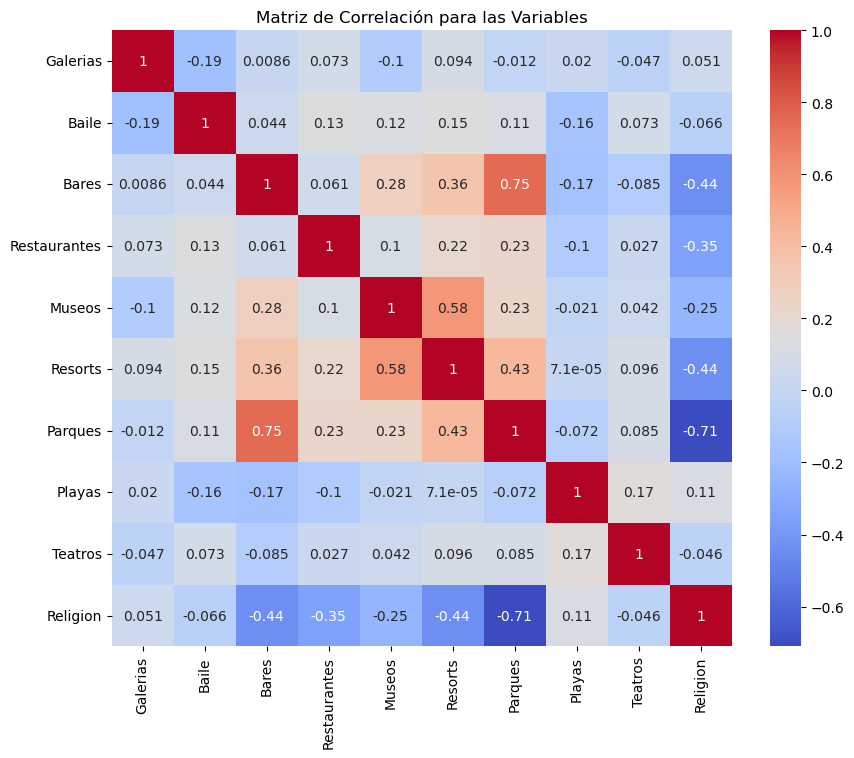

In [58]:
variables = ['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos',
              'Resorts', 'Parques', 'Playas', 'Teatros', 'Religion']

# Generar gráficos de violín para cada variable
for col in variables:
    fig = px.violin(
        df, 
        y=col, 
        box=True, 
        points="all",
        title=f'Gráfico de violín para {col}',
        labels={col: col}
    )
    fig.show()


# Calcular la matriz de correlación para las variables
corr_matrix = df[variables].corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('Matriz de Correlación para las Variables')
plt.show()
# # Generar gráficos de caja para cada variable
# for col in variables:
#     fig = px.box(
#         df, 
#         y=col, 
#         points="all",
#         title=f'Gráfico de caja para {col}',
#         labels={col: col}
#     )
#     fig.show()

# Conclusiones de la correlación
Después de observar los resultados arrojados por la matriz de correlación, podemos observar cómo existen variables con correlación negativa y positiva. Esto nos puede indicar las tendencias sobre qué tipo de aspectos valoran más o menos los usuarios.

Haciendo este análisis podemos observar que los grupos que definimos al principio quizás no sean los adecuados. Veamos los nuevos grupos y hagamos unas primeras conclusiones antes de seguir con el análisis.

- **Variables con correlación negativa**: marcadas con color azul, indican que cuando una sube, la otra tiende a bajar.
    1. Grupo 3: Religión y variables de correlación negativa: Bares, Parques, Resorts. Los usuarios que frecuentan instituciones religiosas tienden a no disfrutar tanto de bares, parques o resorts, lo que podría reflejar ciertas diferencias en el estilo de vida o preferencias más tranquilas.

- **Variables con correlación positiva**: marcadas con color rojo, indican que cuando una de ellas sube, la otra también tiende a subir. Esto indica preferencias o similitudes de gustos de los usuarios frente a diferentes actividades.

    1. **Grupo 1: Bares, Parques, Resorts**  
    Los usuarios que disfrutan de bares también tienden a preferir parques y resorts. Este grupo podría representar a personas que prefieren actividades al aire libre o sociales.  

    2. **Grupo 2: Museos y Resorts**  
    Los usuarios que valoran los museos también disfrutan de resorts. Este grupo puede indicar una preferencia por actividades culturales y de relax. 

    3. **Grupo 4: Galerías, Restaurantes, Museos**  
    Este grupo agrupa actividades culturales y gastronómicas, lo que podría representar a personas interesadas en experiencias artísticas y de comida.  
        - **Correlación Positiva (aunque baja)**:

    4. **Grupo 5: Baile y Teatros**  
    Aunque la correlación es baja, podría sugerir que las personas que disfrutan de clubes de baile también están interesadas en espectáculos o entretenimiento en teatros.  
        - **Correlación Positiva (aunque baja)**:
    

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px


# Definir las variables de interés
variables = ['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos', 
             'Resorts', 'Parques', 'Playas', 'Teatros', 'Religion']

# Preprocesar los datos: Normalización
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables])

# Definir los nuevos grupos de variables
nuevos_grupos = {
    "Grupo 1": ["Bares", "Parques", "Resorts"],
    "Grupo 2": ["Museos", "Resorts"],
    "Grupo 3": ["Religion", "Bares", "Parques", "Resorts"],
    "Grupo 4": ["Galerias", "Restaurantes", "Museos"],
    "Grupo 5": ["Baile", "Teatros"]
}

# Análisis de Frecuencia
for grupo, variables in nuevos_grupos.items():
    print(f"Frecuencia de actividades para {grupo}")
    for var in variables:
        print(f"{var}:")
        print(df[var].value_counts())
        print()


Frecuencia de actividades para Grupo 1
Bares:
Bares
0.22    45
0.19    34
0.24    31
0.21    28
0.26    27
        ..
2.84     1
1.45     1
1.19     1
2.82     1
1.13     1
Name: count, Length: 195, dtype: int64

Parques:
Parques
3.18    581
3.19    167
3.17    164
3.20     55
3.16     12
3.21      1
Name: count, dtype: int64

Resorts:
Resorts
1.70    29
1.58    26
1.86    23
1.66    22
1.78    22
        ..
2.91     1
3.02     1
3.38     1
3.16     1
0.40     1
Name: count, Length: 135, dtype: int64

Frecuencia de actividades para Grupo 2
Museos:
Museos
0.82    33
0.70    29
0.74    29
0.78    29
0.98    26
        ..
1.90     1
0.06     1
1.70     1
2.54     1
1.86     1
Name: count, Length: 87, dtype: int64

Resorts:
Resorts
1.70    29
1.58    26
1.86    23
1.66    22
1.78    22
        ..
2.91     1
3.02     1
3.38     1
3.16     1
0.40     1
Name: count, Length: 135, dtype: int64

Frecuencia de actividades para Grupo 3
Religion:
Religion
2.54    47
2.46    47
2.66    39
2.78    38

# Análisis de los valores atípicos


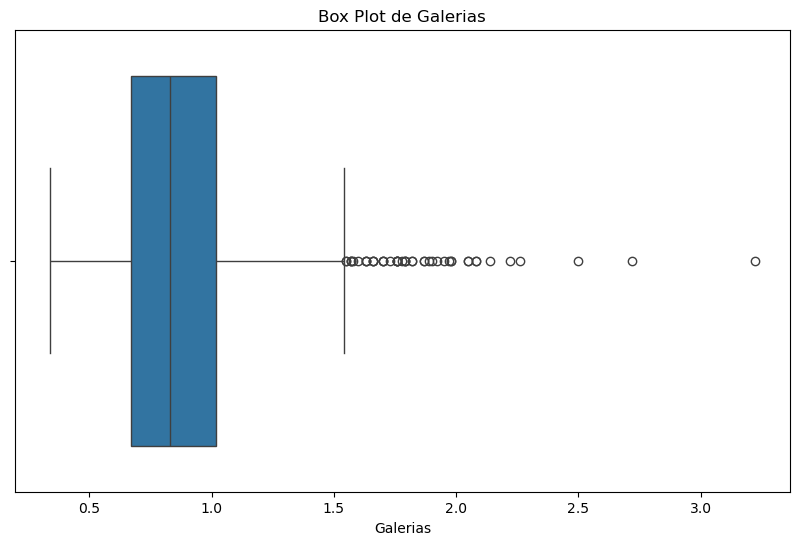

Valores atípicos en Galerias:
User ID
User 46     1.70
User 62     1.98
User 71     1.60
User 81     2.08
User 85     1.92
User 109    1.76
User 124    1.98
User 158    2.05
User 172    1.90
User 193    1.70
User 240    2.08
User 259    2.22
User 263    1.58
User 299    1.79
User 309    1.55
User 323    3.22
User 340    1.57
User 351    1.57
User 360    1.76
User 374    1.79
User 395    1.76
User 398    1.57
User 426    1.97
User 465    1.78
User 467    1.55
User 502    2.72
User 506    2.50
User 554    1.63
User 596    1.76
User 615    1.87
User 618    1.82
User 626    1.66
User 632    2.05
User 641    1.73
User 667    1.95
User 671    1.63
User 673    1.76
User 678    2.26
User 679    1.66
User 697    1.66
User 730    1.63
User 760    1.70
User 794    1.82
User 796    2.14
User 870    1.89
User 906    1.79
User 954    1.87
Name: Galerias, dtype: float64



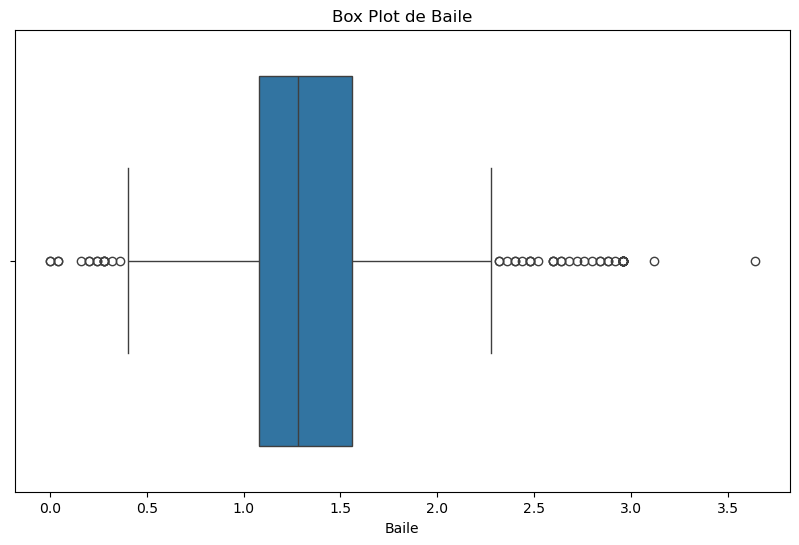

Valores atípicos en Baile:
User ID
User 12     2.96
User 16     2.52
User 26     2.84
User 49     2.96
User 76     2.96
User 85     0.28
User 89     2.36
User 109    0.04
User 123    2.68
User 146    2.96
User 223    2.32
User 229    2.96
User 242    2.48
User 255    2.40
User 259    0.24
User 280    0.36
User 309    0.00
User 378    2.96
User 409    2.80
User 413    2.72
User 414    2.60
User 423    2.92
User 427    2.48
User 434    2.64
User 435    2.32
User 447    2.88
User 484    2.96
User 494    2.64
User 517    0.00
User 532    0.16
User 542    0.28
User 546    2.96
User 555    2.40
User 600    2.96
User 609    3.12
User 615    0.28
User 626    0.24
User 642    2.96
User 643    2.76
User 703    2.96
User 709    0.20
User 729    2.96
User 746    2.60
User 748    2.84
User 803    0.32
User 804    0.04
User 813    3.64
User 870    0.28
User 883    2.96
User 889    2.60
User 904    2.88
User 927    2.48
User 975    2.44
User 979    0.20
Name: Baile, dtype: float64



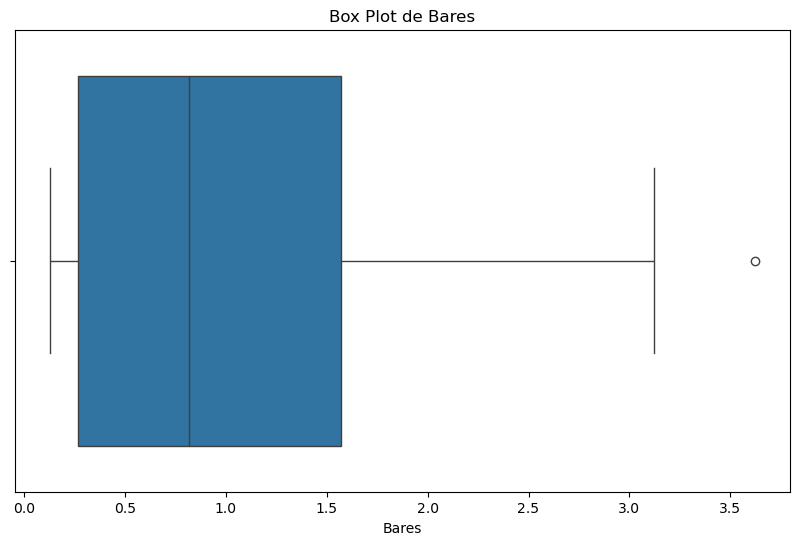

Valores atípicos en Bares:
User ID
User 916    3.62
Name: Bares, dtype: float64



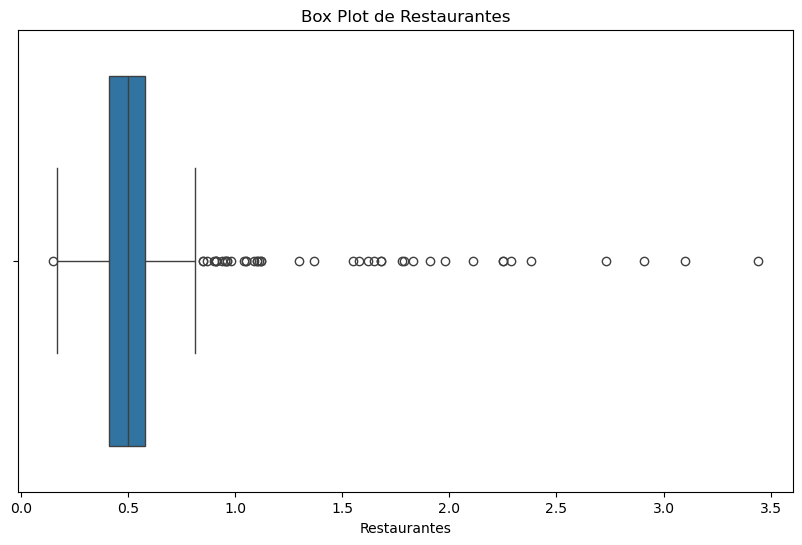

Valores atípicos en Restaurantes:
User ID
User 72     0.96
User 83     1.65
User 87     1.10
User 89     1.68
User 115    0.96
User 176    1.05
User 200    1.79
User 227    1.78
User 240    0.15
User 248    2.73
User 258    1.62
User 275    2.91
User 287    2.25
User 296    1.11
User 357    1.04
User 373    1.68
User 383    0.87
User 414    0.91
User 423    1.58
User 438    2.11
User 474    0.85
User 479    0.85
User 580    1.12
User 593    2.38
User 602    3.10
User 605    0.91
User 667    3.44
User 695    2.25
User 729    1.98
User 746    0.90
User 748    1.83
User 776    1.10
User 825    1.05
User 830    2.29
User 838    1.30
User 889    0.95
User 897    0.94
User 903    1.09
User 904    1.91
User 915    0.91
User 916    1.37
User 950    0.95
User 954    0.98
User 955    1.12
User 973    1.55
Name: Restaurantes, dtype: float64



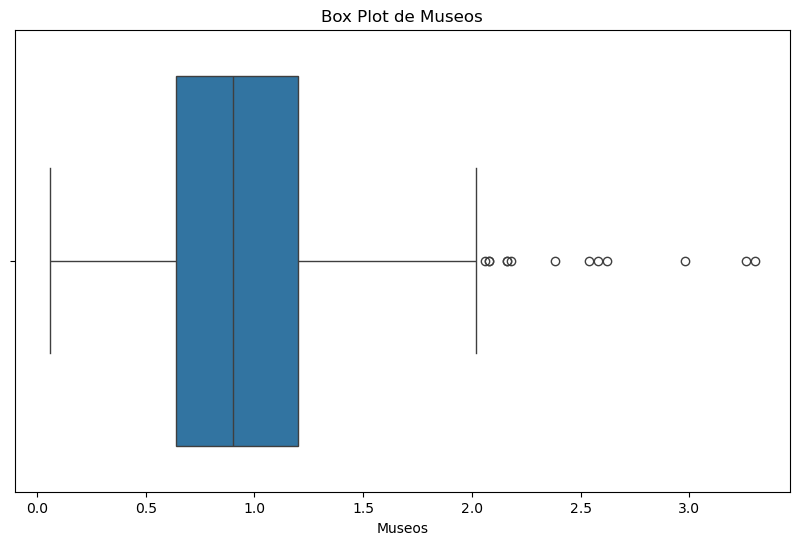

Valores atípicos en Museos:
User ID
User 33     2.08
User 53     2.54
User 100    2.16
User 235    2.38
User 434    2.06
User 480    3.30
User 488    2.58
User 508    2.98
User 509    2.62
User 539    2.18
User 627    2.08
User 672    2.16
User 868    3.26
Name: Museos, dtype: float64



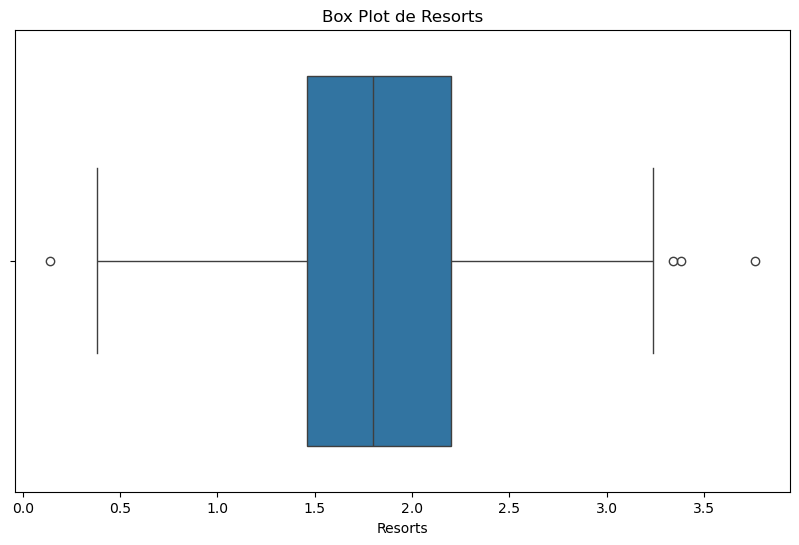

Valores atípicos en Resorts:
User ID
User 19     3.38
User 240    0.14
User 537    3.76
User 609    3.34
Name: Resorts, dtype: float64



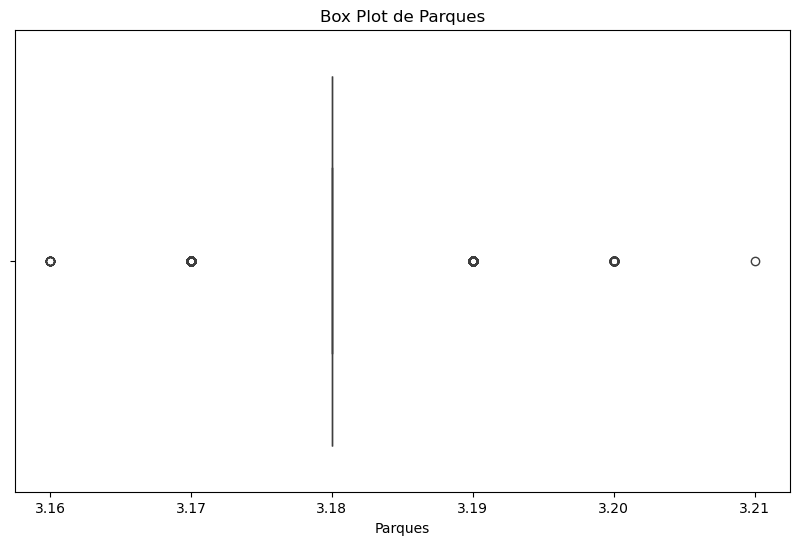

Valores atípicos en Parques:
User ID
User 1      3.19
User 2      3.21
User 6      3.17
User 7      3.17
User 8      3.17
            ... 
User 966    3.17
User 967    3.19
User 975    3.19
User 976    3.17
User 978    3.17
Name: Parques, Length: 399, dtype: float64



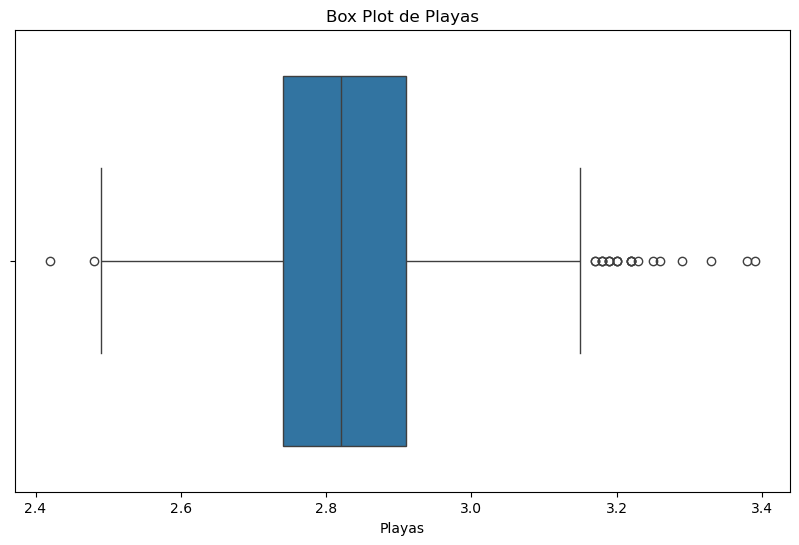

Valores atípicos en Playas:
User ID
User 181    3.29
User 282    3.22
User 294    3.26
User 309    3.22
User 359    3.25
User 365    3.17
User 461    3.20
User 468    3.38
User 471    2.42
User 484    3.18
User 520    3.23
User 613    3.39
User 642    3.22
User 651    3.20
User 659    3.18
User 713    3.19
User 769    3.19
User 772    2.48
User 776    3.17
User 812    3.33
User 859    3.20
User 909    3.22
User 960    3.18
User 966    3.19
Name: Playas, dtype: float64



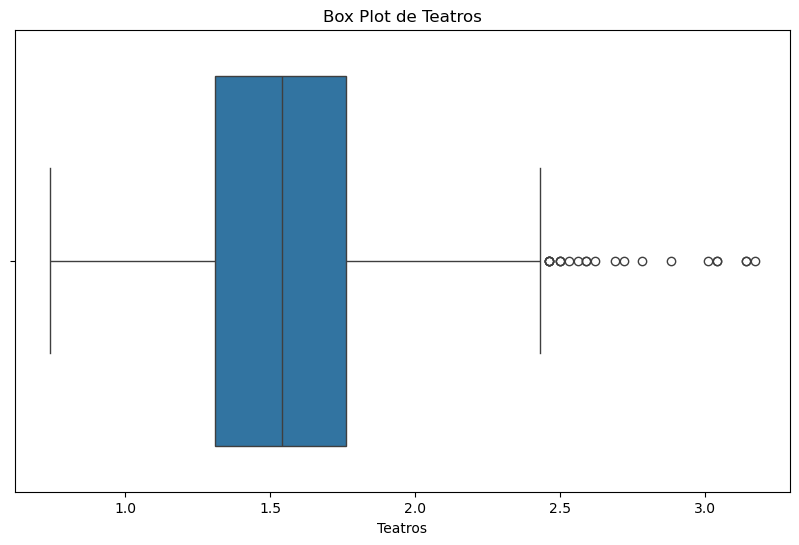

Valores atípicos en Teatros:
User ID
User 100    3.04
User 111    2.46
User 135    2.50
User 243    2.69
User 244    2.50
User 264    2.46
User 288    3.14
User 308    2.72
User 327    2.50
User 331    3.17
User 342    2.62
User 410    2.53
User 558    2.46
User 614    3.01
User 630    3.04
User 703    2.59
User 721    2.56
User 747    3.14
User 775    2.88
User 815    2.46
User 832    2.78
User 864    2.59
User 972    2.46
Name: Teatros, dtype: float64



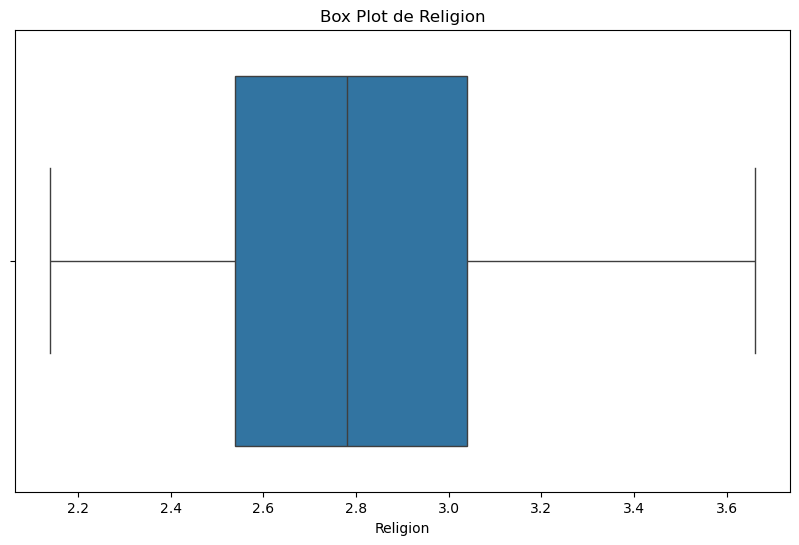

Valores atípicos en Religion:
Series([], Name: Religion, dtype: float64)



In [60]:
variables = ['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos',
              'Resorts', 'Parques', 'Playas', 'Teatros', 'Religion']

for col in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot de {col}')
    plt.xlabel(col)
    plt.show()

    # Calcular valores atípicos utilizando IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Valores atípicos en {col}:')
    print(outliers[col])
    print()

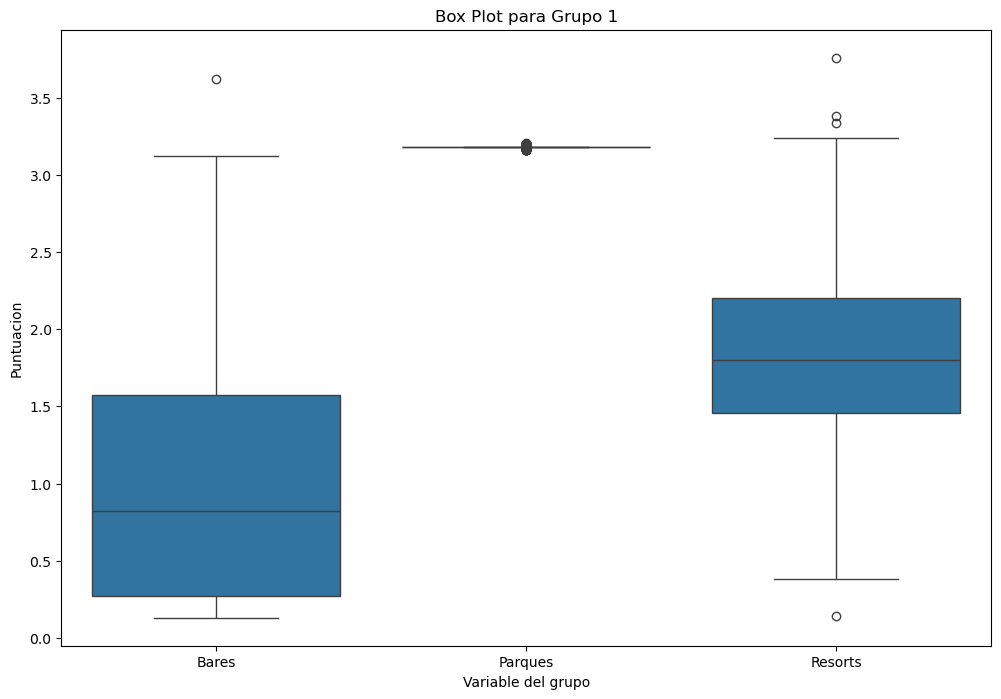

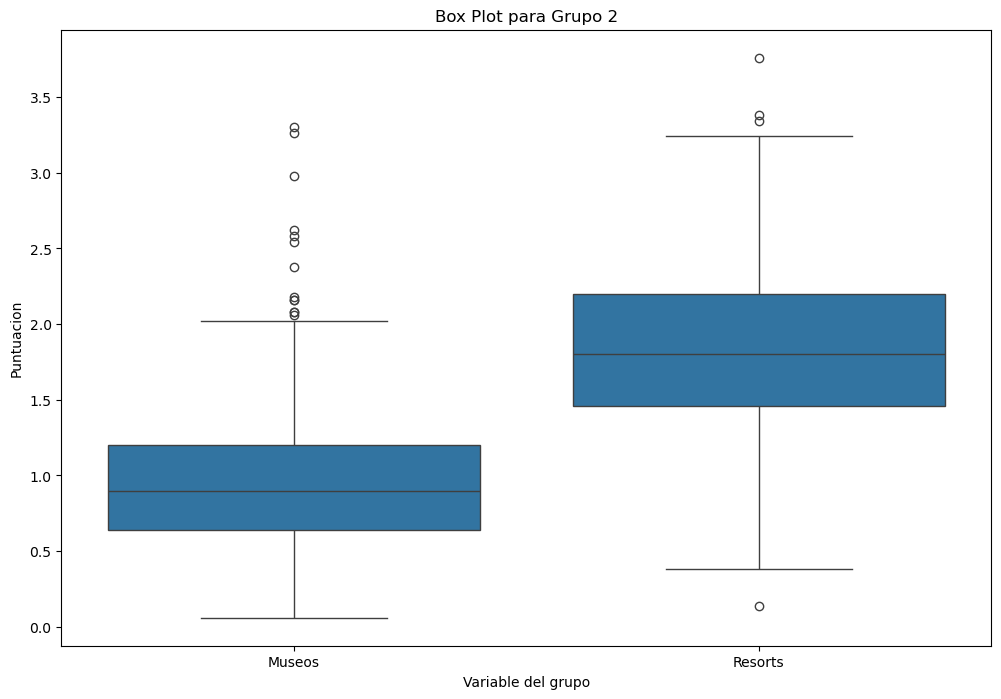

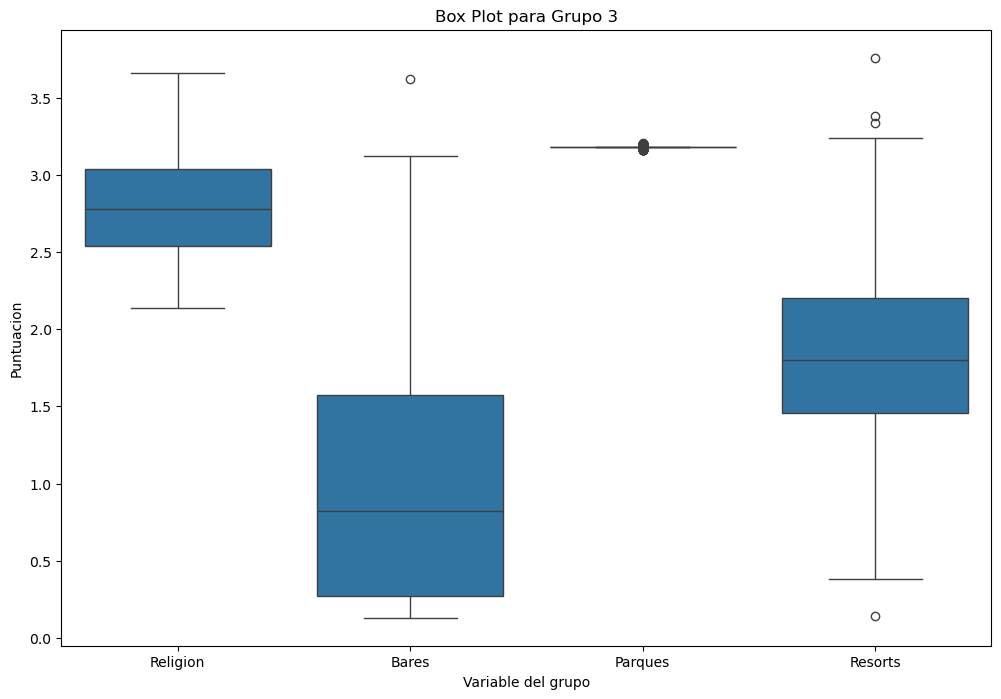

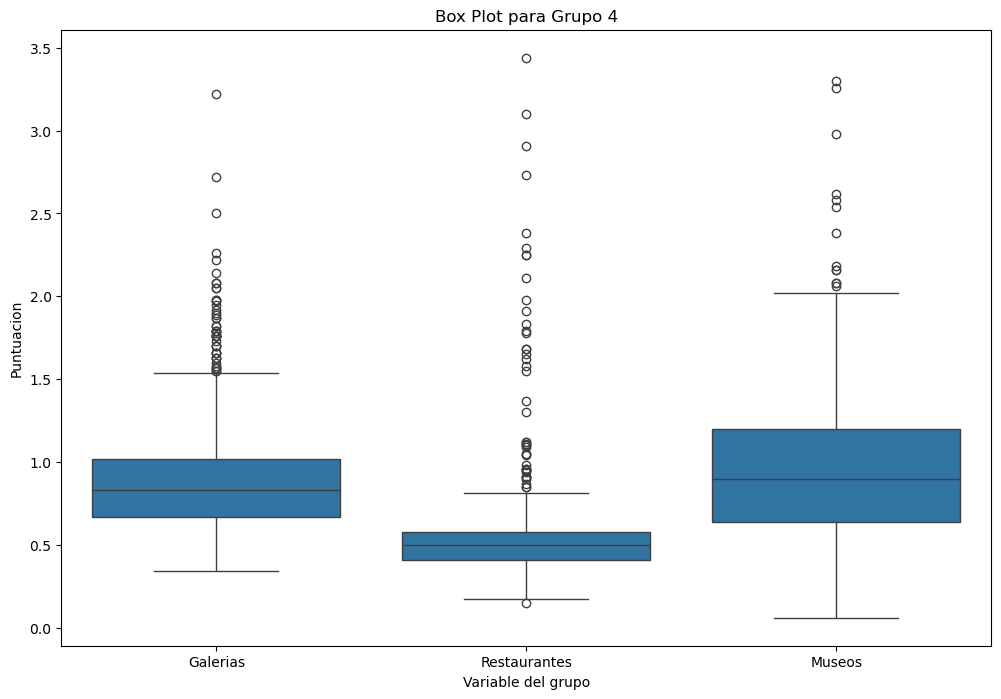

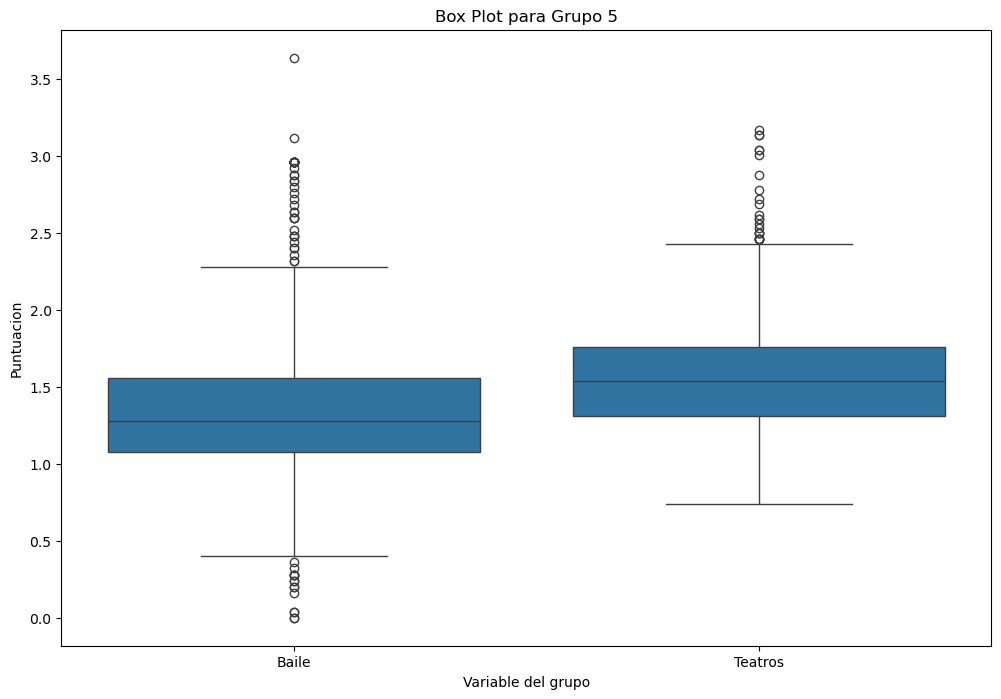

In [61]:
nuevos_grupos = {
    "Grupo 1": ["Bares", "Parques", "Resorts"],
    "Grupo 2": ["Museos", "Resorts"],
    "Grupo 3": ["Religion", "Bares", "Parques", "Resorts"],
    "Grupo 4": ["Galerias", "Restaurantes", "Museos"],
    "Grupo 5": ["Baile", "Teatros"]
}

# Generar gráficos de caja para cada grupo
for grupo, variables in nuevos_grupos.items():
    plt.figure(figsize=(12, 8))
    df_melted = df.melt(value_vars=variables, var_name='Variable', value_name='Valor')
    sns.boxplot(x='Variable', y='Valor', data=df_melted)
    plt.title(f'Box Plot para {grupo}')
    plt.xlabel('Variable del grupo')
    plt.ylabel('Puntuacion')
    plt.show()

# Análisis por variable:  puntuaciones medias por variable, valores máximos y mínimos, etc

In [62]:

# Definir las variables de interés
variables = ['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos', 
             'Resorts', 'Parques', 'Playas', 'Teatros', 'Religion']

# Crear un DataFrame para almacenar los resultados por variable
resultados_por_variable = []

# Analizar cada variable
for var in variables:
    analisis = {
        'Variable': var,
        'Media': df[var].mean(),
        'Mediana': df[var].median(),
        'Desviacion Estandar': df[var].std(),
        'Valor Minimo': df[var].min(),
        'Valor Maximo': df[var].max()
    }
    resultados_por_variable.append(analisis)

# Convertir los resultados a un DataFrame
resultados_por_variable_df = pd.DataFrame(resultados_por_variable)

# Mostrar los resultados
print("Análisis por Variable:")
print(resultados_por_variable_df)

Análisis por Variable:
       Variable     Media  Mediana  Desviacion Estandar  Valor Minimo  \
0      Galerias  0.893194     0.83             0.326912          0.34   
1         Baile  1.352612     1.28             0.478280          0.00   
2         Bares  1.013306     0.82             0.788607          0.13   
3  Restaurantes  0.532500     0.50             0.279731          0.15   
4        Museos  0.939735     0.90             0.437430          0.06   
5       Resorts  1.842898     1.80             0.539538          0.14   
6       Parques  3.180939     3.18             0.007824          3.16   
7        Playas  2.835061     2.82             0.137505          2.42   
8       Teatros  1.569439     1.54             0.364629          0.74   
9      Religion  2.799224     2.78             0.321380          2.14   

   Valor Maximo  
0          3.22  
1          3.64  
2          3.62  
3          3.44  
4          3.30  
5          3.76  
6          3.21  
7          3.39  
8          

# Análisis por grupo: número de valoraciones, puntuaciones medias por variable, valores máximos y mínimos, etc.


### Utilidad de saber el número de valoraciones
1. **Medir la Participación**  
   El número de valoraciones permite medir cuántas veces los usuarios han interactuado con las variables dentro de cada grupo. Esto puede ser útil para entender la popularidad o el interés en ciertos tipos de actividades o lugares.

2. **Identificar Sesgos**  
   Si un grupo tiene significativamente más valoraciones que otros, esto podría indicar un sesgo en los datos. Por ejemplo, si los usuarios tienden a valorar más los bares y parques que los museos y galerías, esto puede influir en los resultados del análisis.

3. **Calidad de los Datos**  
   Un mayor número de valoraciones puede indicar una mayor confiabilidad en las estadísticas descriptivas calculadas para ese grupo. Si un grupo tiene pocas valoraciones, las estadísticas pueden no ser representativas.


In [63]:
# Definir los nuevos grupos de variables
nuevos_grupos = {
    "Grupo 1": ["Bares", "Parques", "Resorts"],
    "Grupo 2": ["Museos", "Resorts"],
    "Grupo 3": ["Religion", "Bares", "Parques", "Resorts"],
    "Grupo 4": ["Galerias", "Restaurantes", "Museos"],
    "Grupo 5": ["Baile", "Teatros"]
}

# Crear un DataFrame para almacenar los resultados por grupo
resultados_por_grupo = []

# Analizar cada grupo
for grupo, variables in nuevos_grupos.items():
    # Filtrar el DataFrame para las variables del grupo actual
    df_grupo = df[variables]
    
    # Calcular las estadísticas descriptivas para el grupo
    analisis = {
        'Grupo': grupo,
        'Numero de Valoraciones': df_grupo.notna().sum().sum(),  # Número total de valoraciones no nulas
        'Media': df_grupo.mean().mean(),
        'Mediana': df_grupo.median().mean(),
        'Desviacion Estandar': df_grupo.std().mean(),
        'Valor Minimo': df_grupo.min().min(),
        'Valor Maximo': df_grupo.max().max()
    }
    resultados_por_grupo.append(analisis)

# Convertir los resultados a un DataFrame
resultados_por_grupo_df = pd.DataFrame(resultados_por_grupo)

# Mostrar los resultados
print("Análisis por Grupo:")
print(resultados_por_grupo_df)

Análisis por Grupo:
     Grupo  Numero de Valoraciones     Media   Mediana  Desviacion Estandar  \
0  Grupo 1                    2940  2.012381  1.933333             0.445323   
1  Grupo 2                    1960  1.391316  1.350000             0.488484   
2  Grupo 3                    3920  2.209092  2.145000             0.414337   
3  Grupo 4                    2940  0.788476  0.743333             0.348025   
4  Grupo 5                    1960  1.461026  1.410000             0.421455   

   Valor Minimo  Valor Maximo  
0          0.13          3.76  
1          0.06          3.76  
2          0.13          3.76  
3          0.06          3.44  
4          0.00          3.64  


## Análisis de Grupos (Actualizado con Nuevas Variables)

### Grupo 1: **Bares, Parques, Resorts**
- **Número de valoraciones**: 2940
- **Media**: 2.01
- **Mediana**: 1.93
- **Desviación estándar**: 0.45
- **Valor mínimo**: 0.13
- **Valor máximo**: 3.76

**Conclusión**: Este grupo tiene valoraciones moderadamente positivas, con una dispersión leve en las opiniones. Las correlaciones positivas entre **Bares, Parques, y Resorts** indican que los usuarios que disfrutan de uno de estos lugares tienden a disfrutar de los otros también, lo que puede sugerir un perfil de usuario que busca actividades sociales y al aire libre. Sin embargo, la desviación estándar moderada indica que hay diferencias en las opiniones dentro del grupo.

### Grupo 2: **Museos, Resorts**
- **Número de valoraciones**: 1960
- **Media**: 1.39
- **Mediana**: 1.35
- **Desviación estándar**: 0.49
- **Valor mínimo**: 0.06
- **Valor máximo**: 3.76

**Conclusión**: Este grupo tiene menos valoraciones y la media es baja, lo que indica que las actividades relacionadas con **Museos** y **Resorts** no son altamente valoradas por muchos usuarios. A pesar de la correlación positiva entre museos y resorts, la dispersión de opiniones sugiere que hay diferencias significativas en la preferencia de estos lugares, lo que puede estar vinculado a los intereses culturales o de relajación de los usuarios.

### Grupo 3: **Religión, Bares, Parques, Resorts**
- **Número de valoraciones**: 3920
- **Media**: 2.21
- **Mediana**: 2.15
- **Desviación estándar**: 0.41
- **Valor mínimo**: 0.13
- **Valor máximo**: 3.76

**Conclusión**: Este grupo tiene la mayor cantidad de valoraciones y la media más alta. Sin embargo, la introducción de **Religión** en el grupo añade una variable con correlaciones negativas con **Bares, Parques, y Resorts**, lo que puede generar una mayor dispersión en las valoraciones. Las personas que valoran la religión probablemente no disfrutan tanto de actividades como bares y resorts, lo que podría provocar una polarización dentro del grupo. A pesar de esto, el promedio más alto sugiere que una mayoría disfruta de las actividades al aire libre y sociales, con una cierta diversidad de opiniones.

### Grupo 4: **Galerías, Restaurantes, Museos**
- **Número de valoraciones**: 2940
- **Media**: 0.79
- **Mediana**: 0.74
- **Desviación estándar**: 0.35
- **Valor mínimo**: 0.06
- **Valor máximo**: 3.44

**Conclusión**: Este grupo presenta valoraciones bajas y consistentes, lo que sugiere que la combinación de actividades culturales como **Galerías**, **Restaurantes**, y **Museos** no satisface a muchos usuarios. La baja dispersión en las valoraciones sugiere que hay una consistencia en la falta de entusiasmo por estas actividades. Sin embargo, la correlación positiva entre las variables indica que, aunque pocos disfruten de estas actividades, aquellos que lo hacen suelen interesarse en todas ellas.

### Grupo 5: **Baile, Teatros**
- **Número de valoraciones**: 1960
- **Media**: 1.46
- **Mediana**: 1.41
- **Desviación estándar**: 0.42
- **Valor mínimo**: 0.00
- **Valor máximo**: 3.64

**Conclusión**: Este grupo presenta una media baja, similar a la del Grupo 2. Las personas que disfrutan de **Baile** y **Teatros** no suelen dar valoraciones altas, lo que sugiere que estas actividades no son tan populares dentro de la muestra. La ligera correlación positiva entre estas variables sugiere que aquellos que disfrutan del teatro también están interesados en el baile, aunque la variabilidad en las opiniones refleja una base de usuarios diversa.

## Conclusiones Generales

- **Grupo 3** es el grupo más positivo en términos de valoraciones, pero ahora muestra una mayor variabilidad debido a la inclusión de **Religión**, lo que podría causar cierta polarización en las opiniones.
- **Grupo 4** sigue siendo el grupo más negativo, lo que indica que actividades culturales como **Galerías**, **Restaurantes**, y **Museos** no generan mucho interés en el conjunto de usuarios.
- **Grupo 2** y **Grupo 5** tienen pocas valoraciones y medias bajas, lo que sugiere que las actividades combinadas no son muy valoradas, aunque hay una dispersión significativa en las opiniones.
- **Grupo 1** muestra una valoración moderadamente positiva, lo que refuerza la idea de que las actividades al aire libre y sociales como **Bares**, **Parques**, y **Resorts** son apreciadas por un segmento importante de usuarios.

El nuevo **Grupo 3**, que combina actividades de **Religión** con lugares como **Bares** y **Resorts**, es el grupo con mayor variabilidad interna, lo que lo convierte en un objetivo clave para estudios más detallados. La polarización en este grupo sugiere que los usuarios tienen preferencias de estilo de vida divergentes que influencian fuertemente las valoraciones.


# Media de las valoraciones por grupos

In [64]:
data_barras = {
    'Grupo': ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'],
    'Media': [2.01, 1.39, 2.21, 0.79, 1.46]
}

df_barras = pd.DataFrame(data_barras)

# Crear gráfico de barras
fig_barras = px.bar(df_barras, x='Grupo', y='Media', 
                    title='Media de Valoraciones por Grupo', 
                    labels={'Media': 'Valoración Media'}, 
                    color='Media', 
                    color_continuous_scale='viridis')

fig_barras.show()

### Conclusión del gráfico

Este gráfico muestra la media de valoraciones en los diferentes grupos:

- **Grupo 3** tiene la valoración media más alta, con una media superior a 2. Esto sugiere que, en promedio, los usuarios de este grupo han dado mejores valoraciones.
- **Grupo 1** también tiene una media relativamente alta, justo por encima de 2, lo que indica una tendencia positiva en las valoraciones.
- **Grupo 2** y **Grupo 5** presentan valoraciones más bajas, con una media entre 1 y 1.5.
- **Grupo 4** tiene la valoración más baja, con una media por debajo de 1, lo que indica que los usuarios de este grupo, en promedio, han dado las peores valoraciones.

Este gráfico resalta claramente cuáles son los grupos con tendencias más positivas y más negativas.


# Distribución de valoraciones por grupo

In [65]:
data_tarta = {
    'Grupo': ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'],
    'Valoraciones': [2940, 1960, 3920, 2940, 1960]
}

# Colores más diferenciados
colores = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5']

# Crear el gráfico de queso con colores personalizados
fig_pie = px.pie(data_tarta, values='Valoraciones', names='Grupo', 
                 title='Distribución de Valoraciones por Grupo',
                 color_discrete_sequence=colores)

fig_pie.show()


### Conclusión del gráfico
El gráfico de pastel o queso muestra la proporción de valoraciones totales que pertenece a cada grupo:

- **Grupo 3** tiene la mayor proporción de valoraciones, con un 28.6% del total, lo que concuerda con su alto número de valoraciones (3920). Esto lo convierte en el grupo más representativo en cuanto a volumen de valoraciones.
- **Grupo 1** y **Grupo 4** tienen proporciones similares, ambas alrededor del 21.4%.
- **Grupo 2** y **Grupo 5** son los grupos con menos valoraciones, cada uno con un 14.3% del total.

# Siguientes pasos

Dado que el preprocesamiento de los datos se realiza para posteriormente aplicar modelos de aprendizaje automático, es necesario evaluar si nuestros datos deberían ser normalizados y estandarizados.


## Estandarización
Si deseamos seguir comprobando si nuestros grupos definidos por la matriz de correlación son correctos, se debería aplicar la clusterización por k means, donde es importante tener unos datos **estandarizados**.

Debido a la alta variabilidad entre las variables en los valores de desviación estándar y la alta presencia de valores atípicos en los gráficos de caja, es necesario **estandarizar los datos** si queremos hacer algo a mayores de un análisis descriptivo de las variables.

## Normalización

Dado que un EDA es el paso previo a la realización de modelos de aprendizaje automático, también es recomendable normalizar los datos. 


## Conclusiones

A continuación se realizará la normalización y estandarización de los datos, con el objetivo de tener un conjunto de datos listo para seguir haciendo un análisis estadístico o bien para poder ser usado en modelos de aprendizaje automático


In [72]:
# Verificar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

features = df[['Bares', 'Parques', 'Resorts', 'Museos', 'Religion', 
               'Galerias', 'Restaurantes', 'Baile', 'Teatros']]

# Estandarización
scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(features)
df_standardized = pd.DataFrame(features_standardized, columns=features.columns)

# Mostrar los resultados de la estandarización
print("Estandarización:")
print(df_standardized.head())





Columnas disponibles en el DataFrame:
Index(['Galerias', 'Baile', 'Bares', 'Restaurantes', 'Museos', 'Resorts',
       'Parques', 'Playas', 'Teatros', 'Religion'],
      dtype='object')
Estandarización:
      Bares   Parques   Resorts    Museos  Religion  Galerias  Restaurantes  \
0  1.619750  1.158657  1.070169 -0.319608 -1.180591  0.112645      0.312960   
1  2.089171  3.716053  2.479500  1.098486 -1.491908  0.388088      0.384494   
2 -0.600487 -0.120041 -0.561689 -1.600466 -0.931537  1.000186     -0.008942   
3 -0.917663 -0.120041 -0.598777 -1.097272  0.189205 -1.356389      0.134126   
4  0.211486 -0.120041  0.328415  1.372955 -0.807010 -1.172760      0.134126   

      Baile   Teatros  
0  0.935887  0.687518  
1  1.772644  0.797274  
2 -1.156005 -0.711877  
3  0.935887  0.001540  
4 -0.319248 -1.068585  
Normalización:
      Bares  Parques   Resorts    Museos  Religion  Galerias  Restaurantes  \
0  0.618911      0.6  0.629834  0.228395  0.184211  0.204861      0.142857   
1  0.72

In [ ]:
# Normalización
scaler_minmax = MinMaxScaler()
features_normalized = scaler_minmax.fit_transform(features)
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Mostrar los resultados de la normalización
print("Normalización:")
print(df_normalized.head())

# Conclusiones del proceso

## Estandarización

Tras la estandarización, podemos ver cómo algunos valores son negativos. No se trata de un error ni algo inherentemente negativo aunque nuestras variables tengan unidades del 0 al 5.

La estandarización transforma los datos para que tengan media 0 y desciación estándar 1. Los datos pueden dar valores negativos si están debajo de la media.

Es decir, para su **uso en modelos**, la aparición de estos valores no es algo negativo. Sin embargo, sin tan solo queremos interpretar los datos en el contexto original de las reseñas, tan solo deberíamos hacer la normalización.

## Normalización 
Los rangos han sido correctamente escalados entre 0 y 1, por lo que la normalización ha sido interpretada correctamente. Este proceso es útil para algoritmos que precisen de datos en una escala común del 0 al 1.


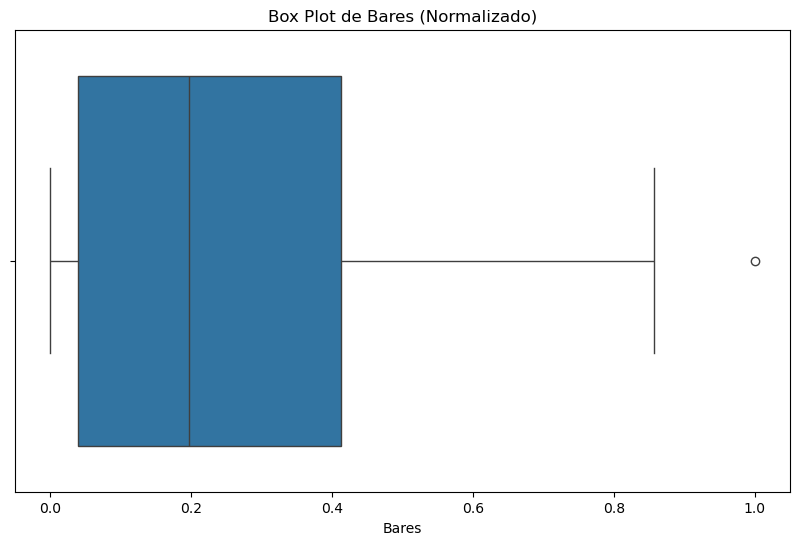

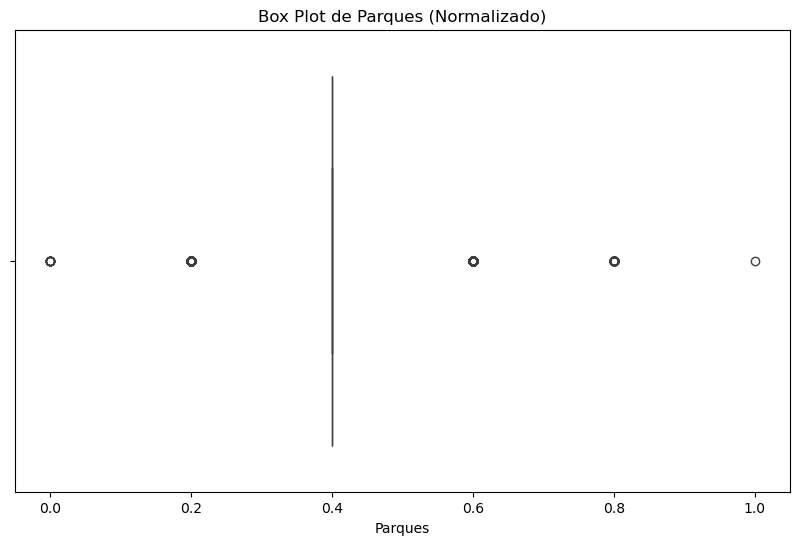

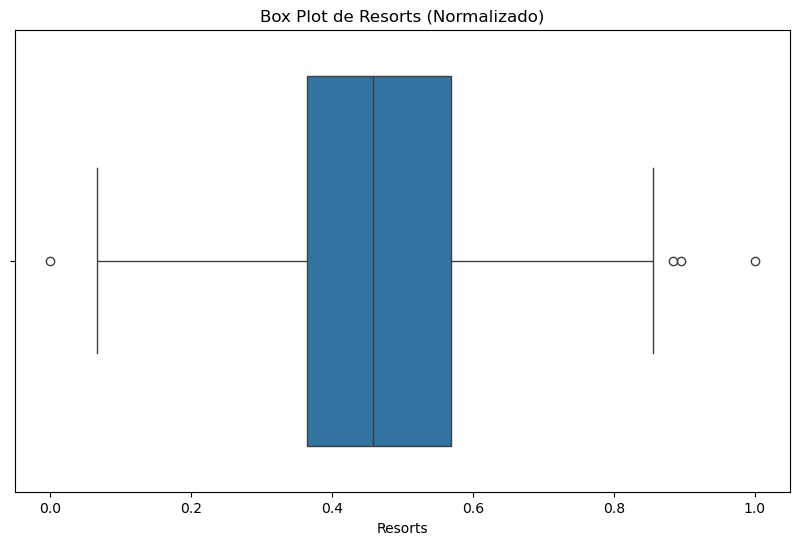

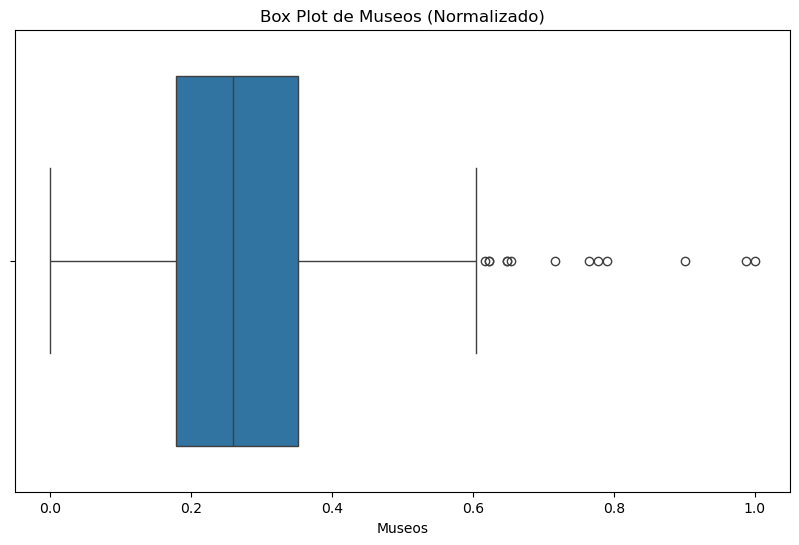

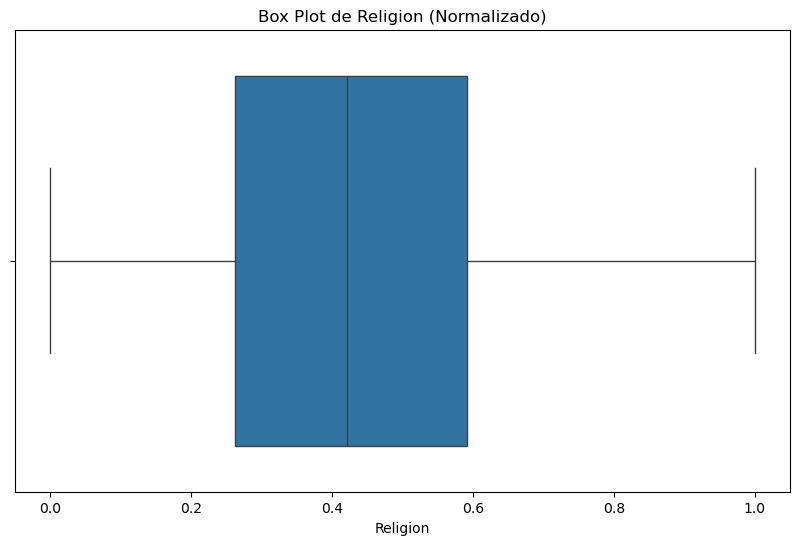

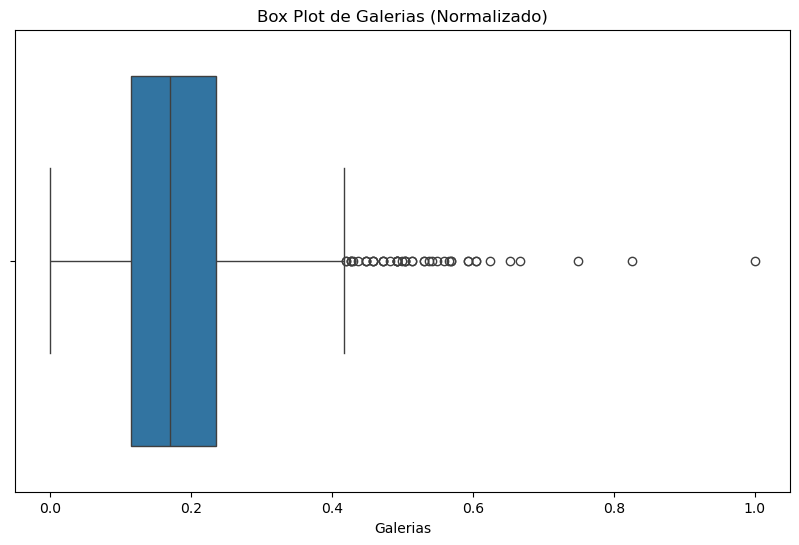

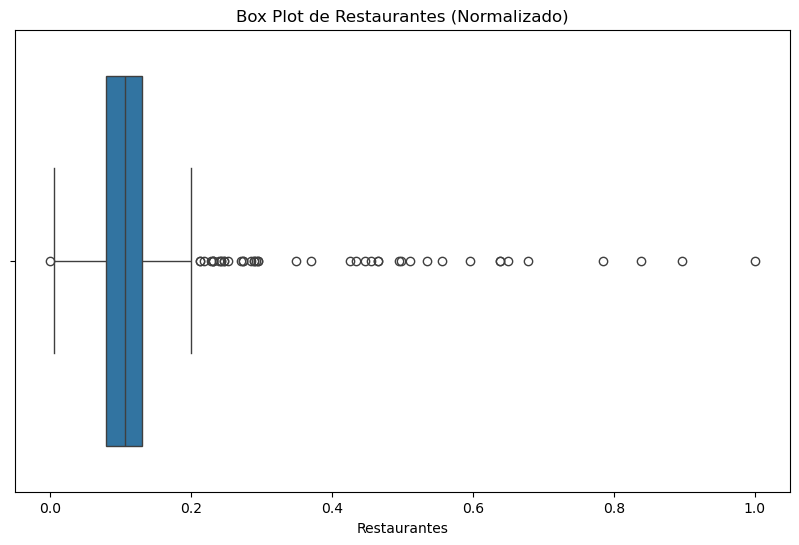

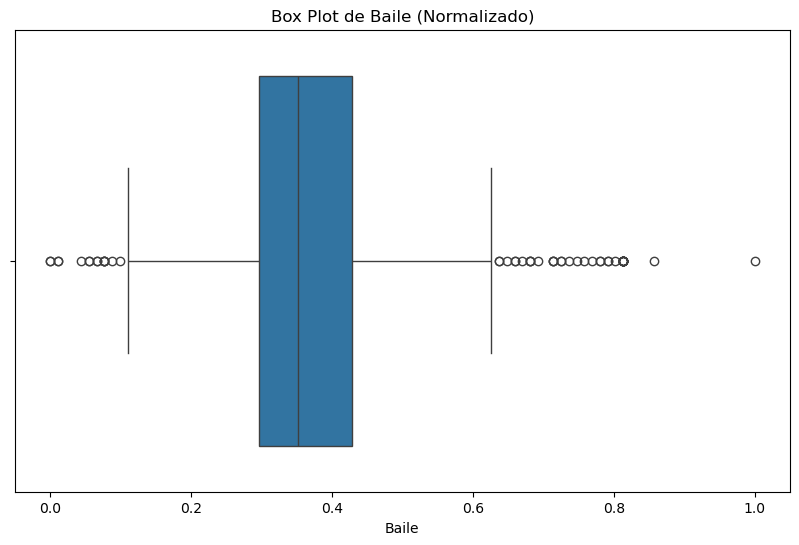

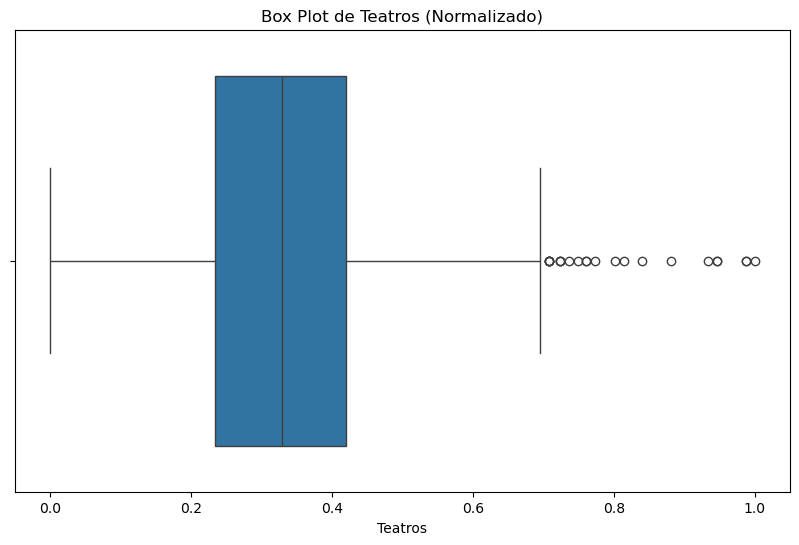

In [73]:


# Generar histogramas
for columna in df_normalized.columns:
    fig = px.histogram(df_normalized, x=columna, nbins=50)
    fig.update_layout(
        title=f'Histograma para {columna} (Normalizado)',
        xaxis_title=columna,
        yaxis_title='Frecuencia'
    )
    fig.show()

# Generar boxplots
for columna in df_normalized.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_normalized[columna])
    plt.title(f'Box Plot de {columna} (Normalizado)')
    plt.xlabel(columna)
    plt.show()


### Conclusiones de los histogramas y boxplots

Podemos ver como los histogramas siguen la misma forma que los datos originales.

En los boxplots siguen apareciendo un alto número de valores atípicos. Esto se debe a la alta variabilidad de las reseñas en algunas de las variables.



Debido al gran número de datos atípicos y de valores relativamente bajos, se podría considerar que haya habido algún tipo de error durante la medición de los datos. En algunas de las variables se puede observar valores muy dispersos o muy bajos, lo que puede llevar a pensar que dichos datos se encuentren sesgados. 

Por tanto, mi valoración final sobre la calidad de los datos es que se deberían realizar algunos ajustes, entre los que destacaría poseer una mayor cantidad de reseñas de más usuarios para comprobar realmente si dicha variabiliad y valores bajos se debe a un sesgo en la medición o a una representación fidedigna de las opiniones de los usuarios.

### Aplicaciones de los resultados.

El análisis de estos datos puede tener amplias aplicaciones a la hora de realizar estudios de marketing sobre las opiniones de los usuarios de TripAdvisor. El análisis de estas tendencias entre los diferentes grupos podría ser útil en recomendaciones más personalizadas para cada usuario.

Además, se podrían realizar modelos predictivos para saber de antemano qué aspectos son más o menos valorados en este continente, con el objetivo de saber a qué tipo de perfil de usuario le puede interesar más o menos este destino.